In [256]:
# Importing required libraries
import numpy as np
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Input
import matplotlib.pyplot as plt
%matplotlib inline

We define below a function that builds a barebones CNN with only one convolution layer, consisting of only one filter. You can call this function inorder to reset the network for subsequent kernels

In [257]:
# Helper function that returns a model with a single conv2d layer
def build_basic(kernel_size = 3,input_shape = (700,500,1)):
    model = Sequential(name = 'Convolution')
    model.add(Input(shape=input_shape))
    model.add(Conv2D(1,kernel_size=kernel_size,padding='same',use_bias=False))
    
    return model

In [258]:
# We intialize the model for demonstration
model = build_basic()
model.summary()

Model: "Convolution"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_39 (Conv2D)              │ (None, 700, 500, 1)    │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

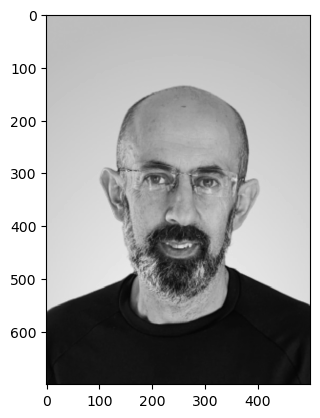

In [259]:
# Here we load the image of my favorite professor as a 2D matrix
img_pavlos = load_img('pavlos.jpeg',color_mode='grayscale',target_size = (700,500))

#Normalizing the image
img_pavlos=np.array(img_pavlos)/255.

#Displaying the images
fig,ax = plt.subplots(1,1)
ax.imshow(img_pavlos,cmap="gray")

Model prediction with random weights
Models are initialized with random weights, and thus the output will not be of significance. However, we show below how you can take the 2D image and pass it through your model to get an output

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


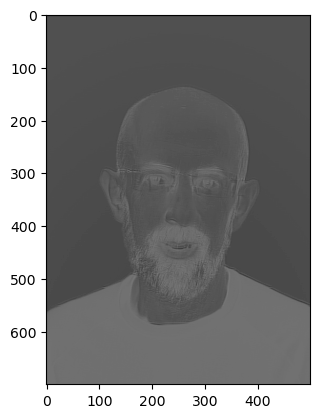

In [260]:
#Converting 2D image tensor to 4D because keras models require 4D tensors as inputs
img_preprocess = np.expand_dims(img_pavlos, axis=[0,3])

# Passing the image through our model
img_out = model.predict(img_preprocess)

# Converting our 4D image back to 2D for visualization with matplotlib
conv_pavlos = img_out.squeeze()
plt.imshow(conv_pavlos,cmap='gray')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


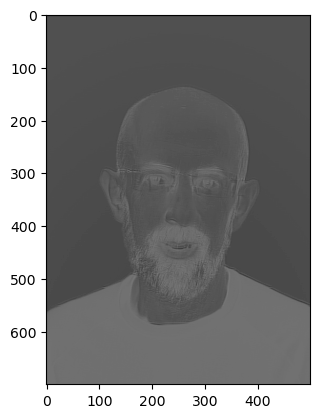

In [261]:
#The above can be done in one step by combining the process
conv_pavlos = model.predict(np.expand_dims(img_pavlos, axis=[0,3])).squeeze()
plt.imshow(conv_pavlos,cmap='gray')

Blurring Kernel
As we saw above, the initialized weights are random, but to perform specific tasks, we know a few kernel matrices. Usually, these kernels are learned during model training, however for demonstration We will be setting the weights for the conv2D layer using Keras set_weights() function

In [262]:
#Defining a kernel for blurring
blur_kernel = np.array([[0.0625, 0.125, 0.0625],
                        [0.125,0.25, 0.125],
                        [0.0625, 0.125, 0.0625]])

# We access the conv2D layer by model.layers[0]
# set_weights() needs a list of weights which are also 4D tensors
# Hence we convert the above 2D blur_kernel to 4D using np.expand_dims
model = build_basic()
model.layers[0].set_weights([np.expand_dims(blur_kernel,axis=[2,3])])

# Now make a prediction using your model and visualize your results 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


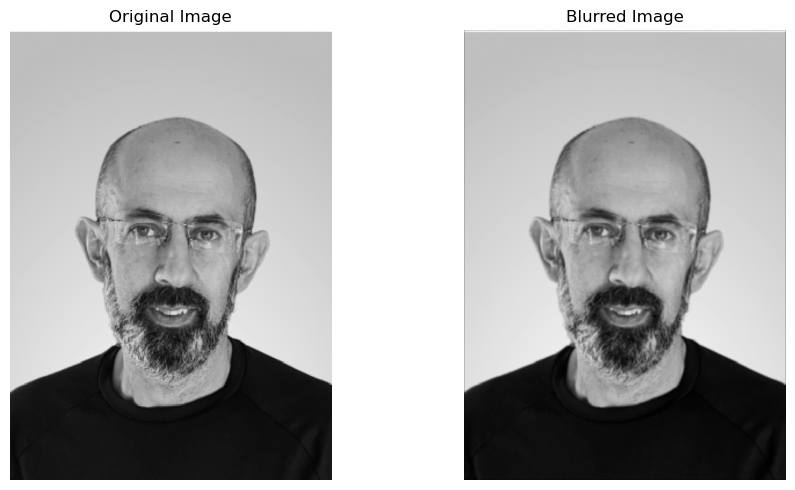

In [263]:
blur_pavlos = model.predict(np.expand_dims(img_pavlos, axis=[0,3])).squeeze()
blur_pavlos = np.clip(blur_pavlos, a_min=0, a_max=1)

# Display the original and blurred images side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Show the original image
axes[0].imshow(img_pavlos, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

# Show the blurred image
axes[1].imshow(blur_pavlos, cmap='gray')
axes[1].set_title('Blurred Image')
axes[1].axis('off')

plt.tight_layout()
plt.show()

Sharpening Kernel
Use the pre-defined sharpening kernel to compare output with original image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


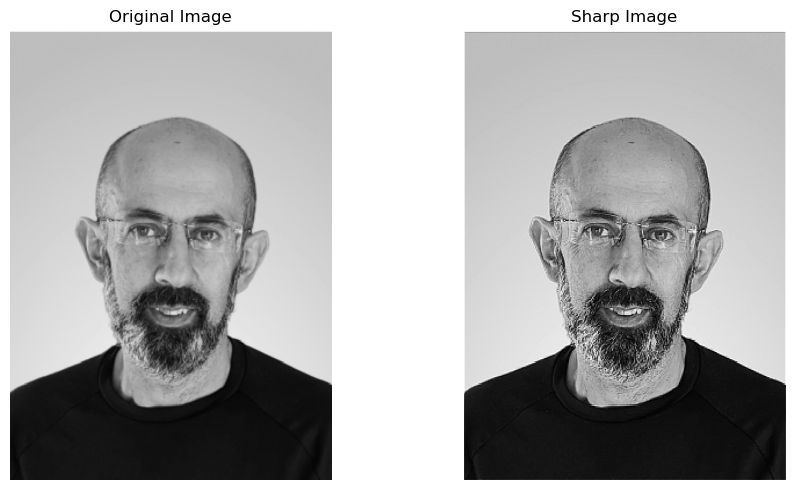

In [264]:
#Defining a kernel for sharpening,

sharp_kernel = np.array([[0, -1, 0],
                         [-1,5, -1],
                         [0,-1, 0]])
model = build_basic()
model.layers[0].set_weights([np.expand_dims(sharp_kernel,axis=[2,3])])

sharp_pavlos = model.predict(np.expand_dims(img_pavlos, axis=[0,3])).squeeze()
sharp_pavlos = np.clip(sharp_pavlos,a_min=0,a_max=1)
# Display the original and blurred images side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Show the original image
axes[0].imshow(img_pavlos, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

# Show the blurred image
axes[1].imshow(sharp_pavlos, cmap='gray')
axes[1].set_title('Sharp Image')
axes[1].axis('off')

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


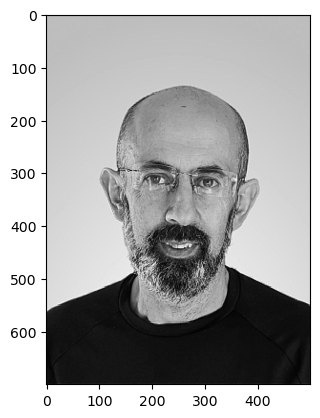

In [265]:
#Try changing the kernel values to see its effect on sharpening

sharp_kernel = np.array([[0, -1, 0],
                         [-1,5, -1],
                         [0,-1, 0]])
model = build_basic()
model.layers[0].set_weights([np.expand_dims(sharp_kernel,axis=[2,3])])

sharp_pavlos = model.predict(np.expand_dims(img_pavlos, axis=[0,3])).squeeze()
sharp_pavlos = np.clip(sharp_pavlos,a_min=0,a_max=1)
plt.imshow(sharp_pavlos,cmap='gray')